### Clustering Jerárquico

A diferencia de de kmeans, que en muchos casos puede ser un problema, es el hecho de que haya que determinar el número de clusters k a priori. Una estrategia posible era determinar el valor de k mirando distintos coeficientes que miden de alguna manera la "calidad" del clustering. 

Los algoritmos de clustering jerárquico no sólo no requieren determinar el número de clusters a priori, sino que ofrecen una visualización de los clusters en forma de arbol que resulta muy informativa, para determinar la granularidad (el nro de clusters) más apropiada.

Los algoritmos de clustering jerárquico "aglomerativos" o "bottom up" en los cuales se comienza por la resolución más fina, en la cual cada punto es un cluster, de modo que hay N clusters de tamaño 1, y se procede a fusionar los pares de clusters más cercanos iterativamente hasta tener un solo cluster de tamaño N.

Este proceso se esquematiza en la siguiente figura:

<img src='img/hierarchical_clustering.png' width=90%>

La figura de abajo a la derecha es la visualización de los clusters que mencionábamos antes, llamada dendrograma. Allí se ve el orden en el cual fueron fusionados los clusters y también a qué distancia se encontraban al momento de unirse. Es decir, la altura de la barra azul horizontal representa la distancia entre los puntos A y C; la altura de la roja, la distancia entre B y el cluster AC.

De esta manera, la visualización del dentrograma muchas veces permite ver cuántos clusters hay en los datos, aún cuando los mismos vivan en un espacio de alta dimensionalidad.

Además de ser necesario definir una medida de distancia, al igual que con k-means, ahora debemos definir un criterio mediante el cual fusionaremos los clusters. A este criterio se lo llama "linkage" y algunas maneras de definirlo son las siguientes:

<img src='img/linkage.png' width=90%>
<img src='img/linkage_2.png' width=90%>

* <b>Ward</b> es la opción por default. Tiende a generar clusters de dimensiones similares y funciona bien en la mayoría de los casos prácticos.

* Si tenemos clusters con diferentes cantidades de miembros, <b>complete</b> y <b> average</b> son buenas opciones.

* <b>Single linkage</b> tiende a generar clusters extendidos en los que las hojas se van agregando de a una.


### Ejemplo

Trabajaremos nuevamente con el dataset "mall_customers.csv".

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np

In [2]:
data=pd.read_csv('../Data/mall_customers.csv')
data.rename({'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},axis=1,inplace=True)
display(data.head(5))

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Al igual que en kmeans, el algoritmo depende de una medida de distancia entre los datos en el espacio de las features. Por este motivo es necesario llevarlas a la misma escala.

In [3]:
X=data[['Income','Spending Score']];

scaler=StandardScaler();

X_sc=scaler.fit_transform(X);

Para implementar el modelo de clustering jerárquico no usaremos la librería scikit-learn sino funciones de la librería scipy, de modo que la sintaxis no involucrará los métodos "fit" y "predict" clásicos de sklearn. Concretamente aplicaremos la función **linkage** a nuestros datos y luego graficaremos los resultados con la función **dendrogram**. Hagámoslo y luego comentamos estas funciones.

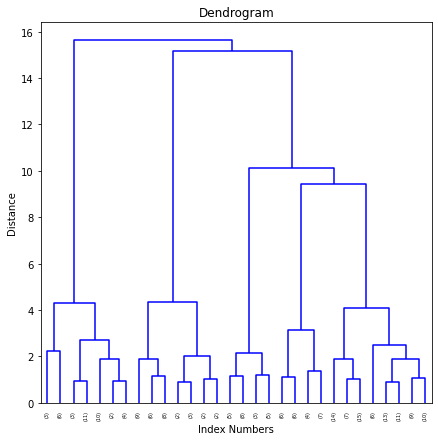

In [4]:
Z = linkage(X_sc, 'ward');

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

#### La función linkage

La función linkage devuelva una matriz **Z** de (n-1) filas y 4 columnas. En la iteración i-ésima, los clusters con índices **Z[i, 0]** y **Z[i, 1]** se combinan para formar el cluster **n + i**. Un cluster con un índice menor a **n** corresponde a una de las **n** observaciones originales. La distancia entre los clusters **Z[i, 0]** and **Z[i, 1]** la encontramos en **Z[i, 2]**. El cuarto valor **Z[i, 3]** representa el número de observaciones en el cluster que se está formando.

#### El dendrograma

Mirando el dendrograma, ¿cuántos clusters se ven en los datos?

Para identificar clusters en el dendrograma debemos definir una distancia de corte en el eje vertical, de manera que nos queden ramas independientes del arbol, cada una de las cuales será un cluster. Y la distancia entre todos los pares de clusters formados será mayor que la distancia de corte. Por ejemplo si cortáramos el arbol a una altura del eje y=6, quedaría así:


In [5]:
list(sns.color_palette('hls'))

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

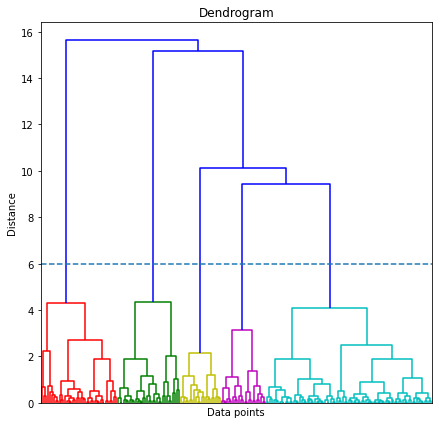

In [6]:
from scipy.cluster import hierarchy 

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')

color_palette=['r','g','y','m','c'];

hierarchy.set_link_color_palette(color_palette) 

dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=6,     
)
plt.hlines(6,0,2000,linestyle='--')
plt.xticks([])
plt.show()

De esta manera quedan definidos 5 clusters, cada uno de los cuales tiene un "diámetro" característico cercano a 4, y que la distancia mínima entre ellos es cercana a 10. Por este motivo esta elección de número de clusters parece adecuada.

Para ver la composición exacta de cada cluster usamos la función fcluster, pasando como argumento la distancia de corte o directamente el número de clusters



Cluster labels:
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 5 1
 2 1 2 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


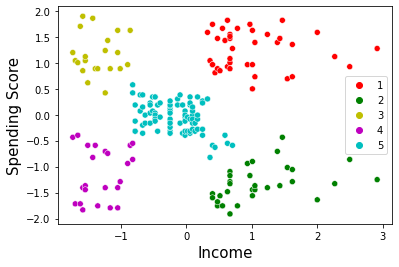

In [7]:
labels=fcluster(Z,5,criterion='maxclust');

print('Cluster labels:\n',labels)

sns.scatterplot(x=X_sc[:,0],y=X_sc[:,1],hue=labels,legend='full',palette=color_palette);
plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);

### Coeficiente Cofenético

Este coeficiente pretende medir la calidad del clustering jerárquico a través de la correlación lineal entre las distancias originales de cada par de puntos y las distancias de los clusters que los contenían al momento de unirse:

$$
c=\frac{\sum_{i<j} (x(i,j)-\bar{x})(t_{i,j}-\bar{t})}
{\sqrt{\sum_{i<j} (x(i,j)-\bar{x})^2 \sum_{i<j} (t(i,j)-\bar{t})^2}}
$$

en donde $x(i,j)$ es la distancia entre los puntos i-j y $t(i,j)$ es la distancia entre los clusters que contenían al punto i y al punto j al momento de unirse.

Uno esperaría que este coeficiente fuera cercano a uno, de modo que las dos distancias estén muy correlacionadas.

En nuestro ejemplo:

In [8]:
c,dists=cophenet(Z, pdist(X_sc))
print('Cophenetic coefficient:',c)

Cophenetic coefficient: 0.7209128193077099


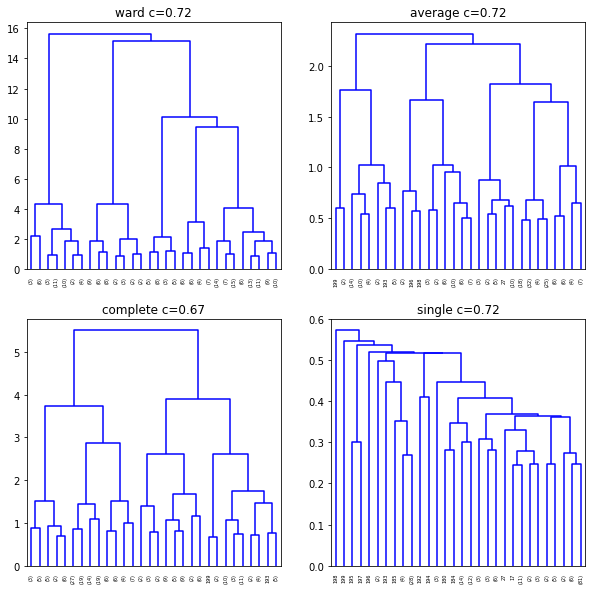

In [9]:
def plot_dendrogram(X_sc,method,ax):
    Z = linkage(X_sc, method);
    c,dists=cophenet(Z, pdist(X_sc));
    ax.set_title(method+' c='+str(np.around(c,2)))        
    ax.set_xticklabels([])
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=5.,  
        color_threshold=0,
        truncate_mode='lastp',
        ax=ax
    )        
    return  



fig,axes=plt.subplots(2,2,figsize=(10,10))

plot_dendrogram(X_sc,'ward',axes[0,0])
plot_dendrogram(X_sc,'average',axes[0,1])
plot_dendrogram(X_sc,'complete',axes[1,0])
plot_dendrogram(X_sc,'single',axes[1,1])
plt.show()

Pueden ver más ejemplos y una discusión ampliada sobre métricas de evaluación del clustering jerárquico [acá](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Selecting-a-Distance-Cut-Off-aka-Determining-the-Number-of-Clusters)

#### 